
# Digital Image Processing — Lecture 05 Code
**Morphological Image Processing **  

This notebook walks through the core ideas and implementations from the lecture using **NumPy** and **pure Python** implementations (no built‑in cv2 filtering).  
We only use **OpenCV (`cv2`) for reading images** and **Matplotlib** for visualization.

> Topics covered
- Introduction to Morphological Image Processing  
- Structuring Elements  
- Fundamental Operations (Erosion, Dilation)  
- Compound Operations (Opening, Closing) 

*Tip:* Run the notebook top‑to‑bottom. Each section has short notes and formulas to revise the slides.


## Introduction to Morphological Image Processing

Morphological image processing focuses on extracting image components to describe their shape and structure. These operations are typically applied to binary images, where each pixel is either 0 or 1.

Key Operations:
- Erosion: Shrinks the foreground objects in a binary image.
- Dilation: Expands the foreground objects in a binary image.
- Opening: Erosion followed by dilation, often used to remove small noise.
- Closing: Dilation followed by erosion, used to close small holes in objects.

### Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Creating the Binary Image

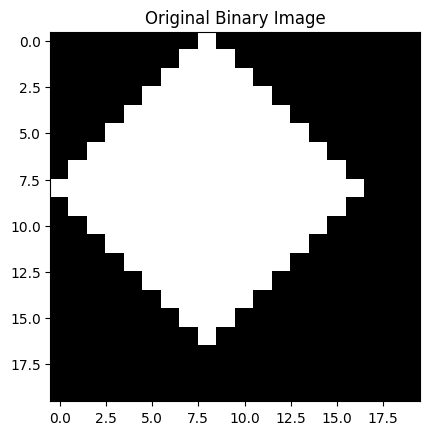

In [3]:
# Create a binary image: 1 represents foreground, 0 represents background
image = np.array([
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
    [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
], dtype=np.uint8)

# Visualize the original image
plt.imshow(image, cmap='gray')
plt.title("Original Binary Image")
plt.show()


## Structuring Elements
What are Structuring Elements?

A structuring element is a small binary matrix that defines the neighborhood used for the operation. It acts like a filter that moves over the binary image.

Types of Structuring Elements:

1. Box-shaped structuring element: A rectangular matrix of 1s.

2. Disk-shaped structuring element: A circular matrix (approximated as a square).

3. Hexagonal structuring element: A matrix that approximates the shape of a hexagon.

We'll create these structuring elements and visualize them.

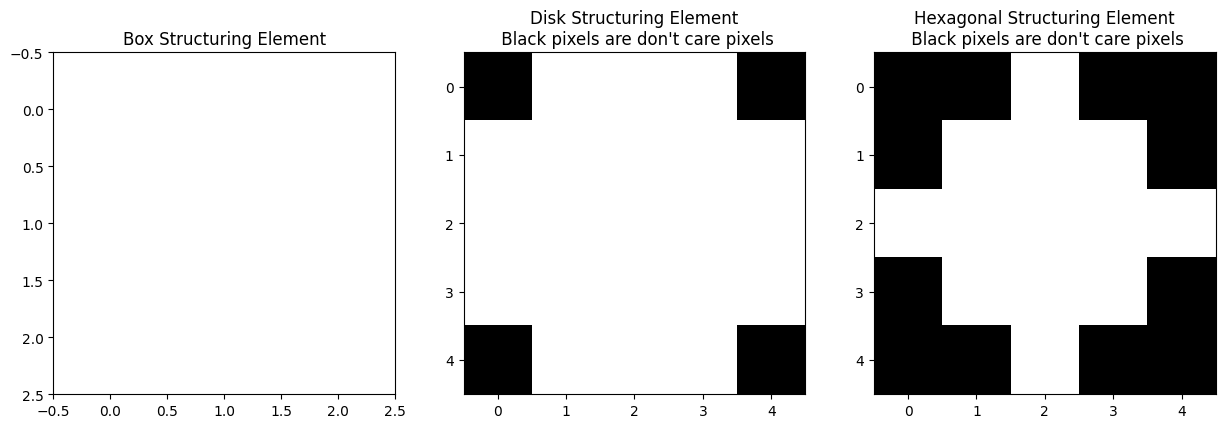

In [4]:
# Create a box-shaped structuring element (3x3)
se_box = np.ones((3, 3), dtype=np.uint8)

# Create a disk-shaped structuring element (approximated with a 5x5 matrix)
se_disk = np.array([[0, 1, 1, 1, 0],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1],
                    [0, 1, 1, 1, 0]], dtype=np.uint8)

# Create a hexagonal structuring element (approximated with a 5x5 matrix)
se_hex = np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)

# Visualize the structuring elements
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(se_box, cmap='binary')
ax[0].set_title('Box Structuring Element')

ax[1].imshow(se_disk, cmap='gray')
ax[1].set_title('Disk Structuring Element\n Black pixels are don\'t care pixels')

ax[2].imshow(se_hex, cmap='gray')
ax[2].set_title('Hexagonal Structuring Element\n Black pixels are don\'t care pixels')

plt.show()


## Erosion
What is Erosion?

Erosion shrinks objects in a binary image. A pixel in the output image is set to 1 if the structuring element fits entirely within the region of interest in the input image.

Erosion Operation with Code:

We’ll apply errosion to the binary image using above structural elements.

In [5]:
# Some python and numpy operations to understand erosion condition
print('1 & 1 =', 1 & 1)
print('1 & 0 =', 1 & 0)
print('[1,1,1,1]', np.all([1, 1, 1, 1]))
print('[1,1,0,1]', np.all([1, 1, 0, 1]))

1 & 1 = 1
1 & 0 = 0
[1,1,1,1] True
[1,1,0,1] False


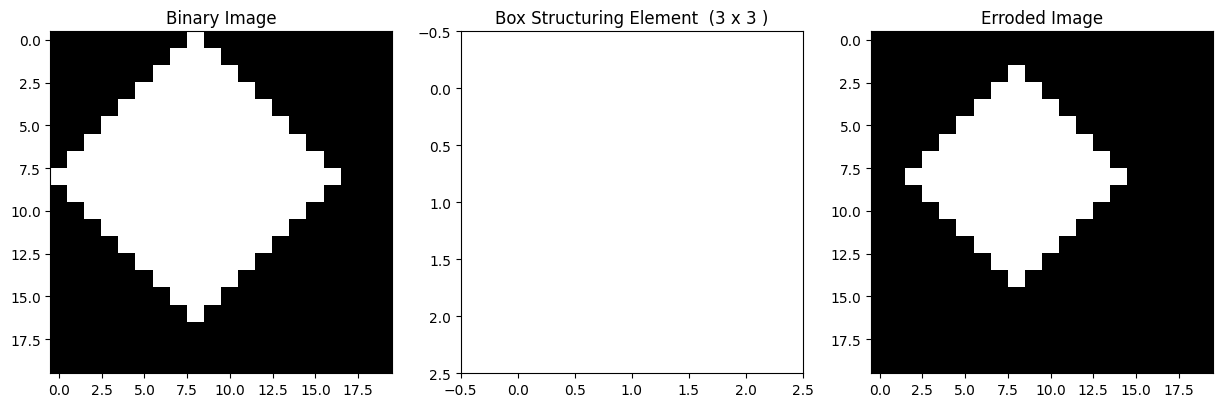

In [6]:
se = se_box  # change this to se_disk or se_hex to test other SEs
image_height, image_width = image.shape
se_height, se_width = se.shape

padding_size = (se_height // 2, se_width // 2)
padded_image = np.pad(image, padding_size, mode='constant', constant_values=0)
eroded_image = np.zeros_like(image)

# Perform erosion
for i in range(image_height):
    for j in range(image_width):
        # Extract region of interest (ROI)
        roi = padded_image[i : i + se_height, j : j + se_width]
            
        # Erosion condition: structuring element must fit entirely within the foreground
        if np.all(roi[se == 1] == 1):  # if all 1's in the ROI match the structuring element
            eroded_image[i , j ] = 1


# Visualize the structuring elements
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Binary Image')

ax[1].imshow(se_box, cmap='binary')
ax[1].set_title('Box Structuring Element  (3 x 3 )')

ax[2].imshow(eroded_image, cmap='gray')
ax[2].set_title('Erroded Image')

plt.show()

Now we will errod the image with disc and hexagon too

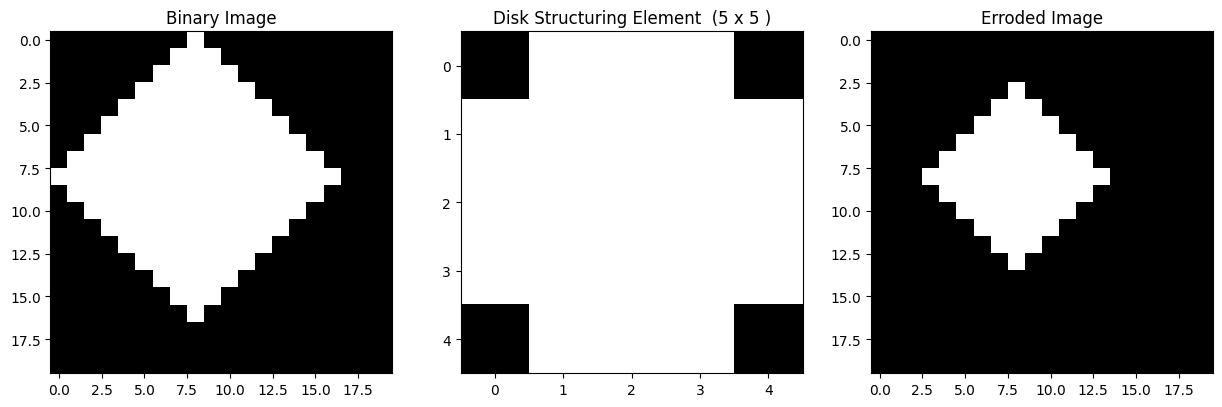

In [7]:
image_height, image_width = image.shape
se_height, se_width = se_disk.shape

padding_size = (se_height // 2, se_width // 2)
padded_image = np.pad(image, padding_size, mode='constant', constant_values=0)
eroded_image = np.zeros_like(image)

# Perform erosion
for i in range(image_height):
    for j in range(image_width):
        # Extract region of interest (ROI)
        roi = padded_image[i : i + se_height, j : j + se_width]
            
        # Erosion condition: structuring element must fit entirely within the foreground
        if np.all(roi[se_disk == 1] == 1):  # if all 1's in the ROI match the structuring element
            eroded_image[i , j ] = 1


# Visualize the structuring elements
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Binary Image')

ax[1].imshow(se_disk, cmap='gray')
ax[1].set_title('Disk Structuring Element  (5 x 5 )')

ax[2].imshow(eroded_image, cmap='gray')
ax[2].set_title('Erroded Image')

plt.show()

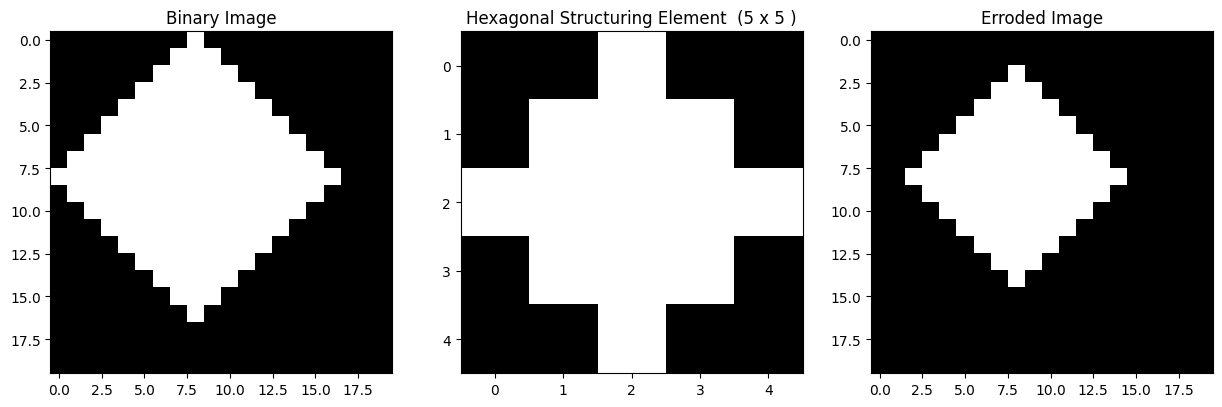

In [8]:
image_height, image_width = image.shape
se_height, se_width = se_hex.shape

padding_size = (se_height // 2, se_width // 2)
padded_image = np.pad(image, padding_size, mode='constant', constant_values=0)
eroded_image = np.zeros_like(image)

# Perform erosion
for i in range(image_height):
    for j in range(image_width):
        # Extract region of interest (ROI)
        roi = padded_image[i : i + se_height, j : j + se_width]
            
        # Erosion condition: structuring element must fit entirely within the foreground
        if np.all(roi[se_hex == 1] == 1):  # if all 1's in the ROI match the structuring element
            eroded_image[i , j ] = 1


# Visualize the structuring elements
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Binary Image')
ax[1].imshow(se_hex, cmap='gray')
ax[1].set_title('Hexagonal Structuring Element  (5 x 5 )')
ax[2].imshow(eroded_image, cmap='gray')
ax[2].set_title('Erroded Image')
plt.show()

Writing a show function for vissualization so we dont have to write the same code for ploting again and again

In [9]:
# We will create a function so we dont have to write the same code for ploting again and again
import matplotlib.pyplot as plt

def show_results(images, titles=None, cols=4, figsize=(16, 6), cmap='gray'):
    """
    Display multiple images side by side.

    Parameters:
        images (list): List of images to display.
        titles (list, optional): List of titles for each image.
        cols (int, optional): Number of columns in the subplot grid.
        figsize (tuple, optional): Figure size.
        cmap (str, optional): Colormap for displaying grayscale images.
    """
    n = len(images)
    rows = (n + cols - 1) // cols  # Compute rows automatically

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.ravel()  # Flatten axes for easy iteration

    for i in range(n):
        axes[i].imshow(images[i], cmap=cmap)
        if titles:
            axes[i].set_title(titles[i])
        axes[i].axis('off')

    # Hide unused subplots (if any)
    for i in range(n, rows * cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

## Dilation
What is Dilation?

Dilation expands objects in a binary image. A pixel in the output image is set to 1 if the structuring element "hits" any of the foreground pixels in the input image.

Dilation Operation with Code:

We’ll apply dilation to the binary image using the structural element we have seen so far in this notebook.

In [10]:
print('np.any examples some values zeros and 1"s:', np.any([1, 0, 0, 0]))
print('np.any examples with all values zeros:', np.any([0, 0, 0, 0]))
print('np.any examples with all values 1"s:', np.any([[1, 1, 1, 1]]))

np.any examples some values zeros and 1"s: True
np.any examples with all values zeros: False
np.any examples with all values 1"s: True


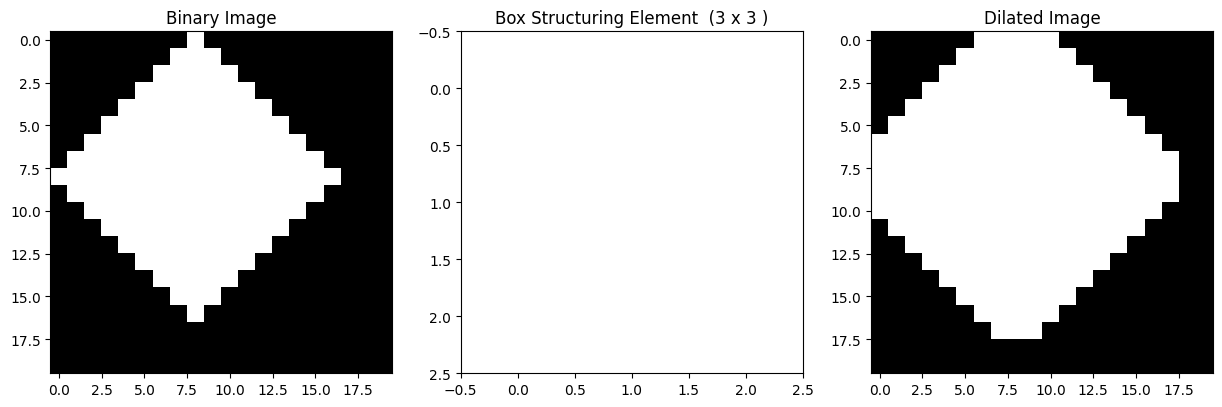

In [11]:
# Dilation with box structuring element
image_height, image_width = image.shape
se_height, se_width = se_box.shape

padding_size = (se_height // 2, se_width // 2)
padded_image = np.pad(image, padding_size, mode='constant', constant_values=0)

dilated_image = np.zeros_like(image)

# Perform dilation
for i in range(image_height):
    for j in range(image_width):
        # Extract region of interest (ROI)
        roi = padded_image[i:i+se_height, j:j+se_width]
            
        # Dilation condition: structuring element hits any foreground pixel
        if np.any(roi[se_box == 1] == 1):  # if any 1's in the ROI match the structuring element
            dilated_image[i , j] = 1

# Visualize the structuring elements
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Binary Image')
ax[1].imshow(se_box, cmap='binary')
ax[1].set_title('Box Structuring Element  (3 x 3 )')
ax[2].imshow(dilated_image, cmap='gray')
ax[2].set_title('Dilated Image')
plt.show()

Now we will dilate the same image with disc and hexagon too

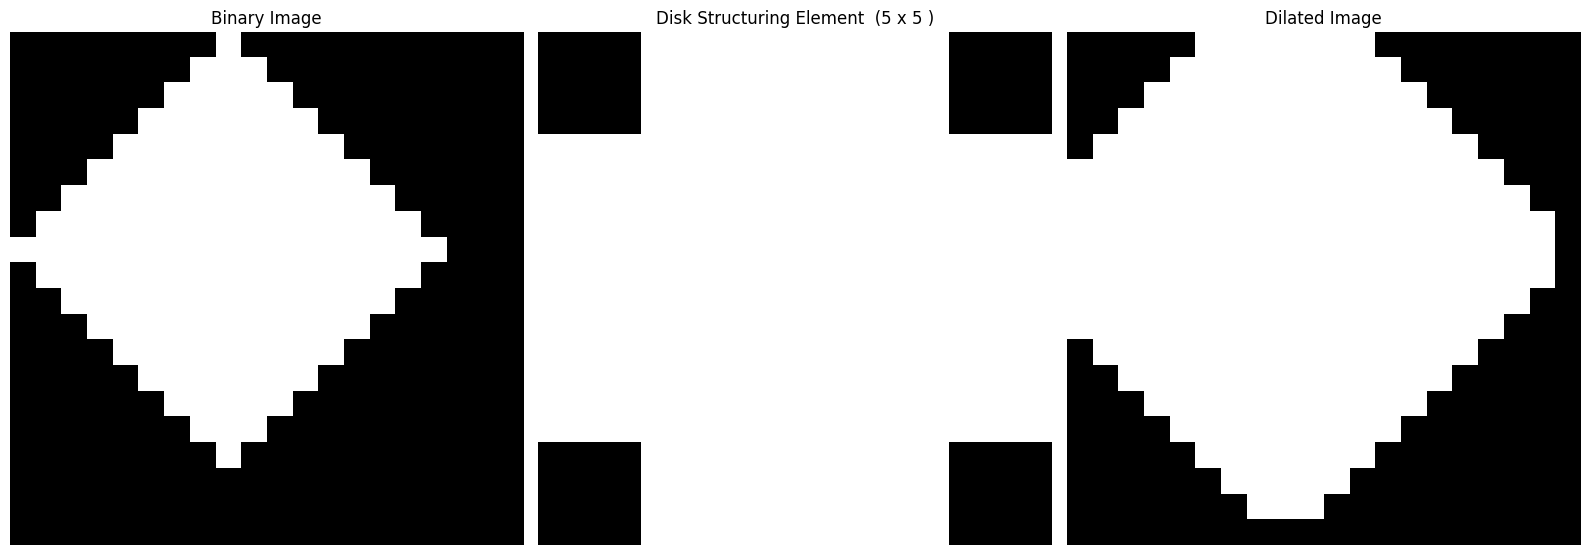

In [12]:
se_row, se_col = se_disk.shape
padding_size = (se_row // 2, se_col // 2)
padded_image = np.pad(image, padding_size, mode='constant', constant_values=0)

dilated_image = np.zeros_like(image)
rows, cols = dilated_image.shape

# Perform dilation
for row in range(rows):
    for col in range(cols):
        # Extract region of interest (ROI)
        roi = padded_image[row:row+se_row, col:col+se_col]
            
        # Dilation condition: structuring element hits any foreground pixel
        if np.any(roi[se_disk == 1] == 1):  # if any 1's in the ROI match the structuring element
            dilated_image[row , col] = 1

# Visualize the structuring elements
show_results(
    images=[image, se_disk, dilated_image],
    titles=['Binary Image', 'Disk Structuring Element  (5 x 5 )', 'Dilated Image'],
    cols=3
)

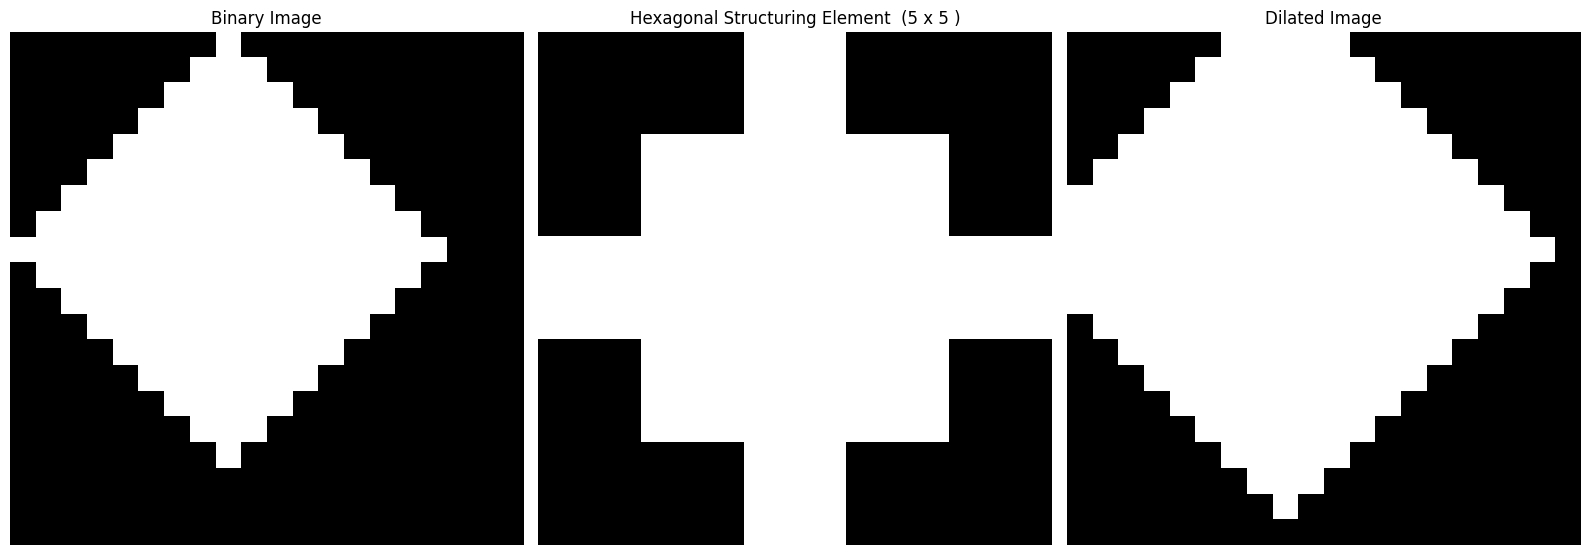

In [13]:
# Dilate with hexagonal structuring element

se_row, se_col = se_hex.shape
padding_size = (se_row // 2, se_col // 2)
padded_image = np.pad(image, padding_size, mode='constant', constant_values=0)

dilated_image = np.zeros_like(image)
rows, cols = dilated_image.shape

# Perform dilation
for row in range(rows):
    for col in range(cols):
        # Extract region of interest (ROI)
        roi = padded_image[row:row+se_row, col:col+se_col]
            
        # Dilation condition: structuring element hits any foreground pixel
        if np.any(roi[se_hex == 1] == 1):  # if any 1's in the ROI match the structuring element
            dilated_image[row , col] = 1

# Visualize the structuring elements
show_results(
    images=[image, se_hex, dilated_image],
    titles=['Binary Image', 'Hexagonal Structuring Element  (5 x 5 )', 'Dilated Image'],
    cols=3
)

## Some Practical Examples of Errosion

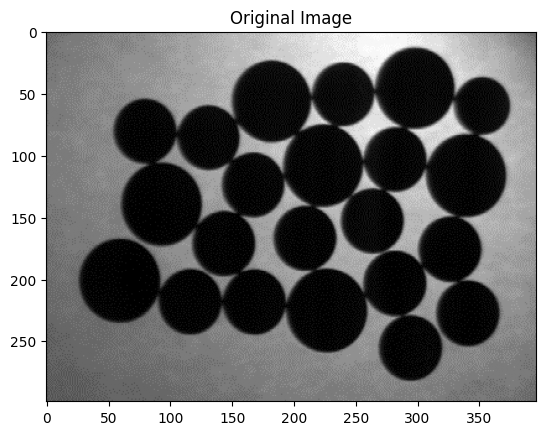

In [14]:
image = cv2.imread('c1.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

To convert this image into binary image we will use thresholding

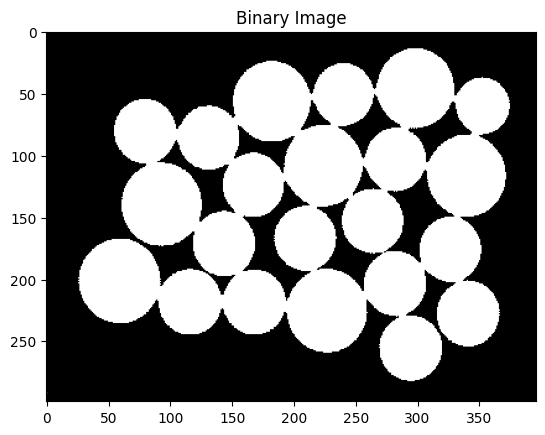

In [15]:
binary_image = np.where(image > 100, 0, 1).astype(np.uint8)
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.show()

Counting these coins is difficult because they touch each other! <br>
Solution: Erosion separates them!

Alse create a function for errosion to use anywhere in the file


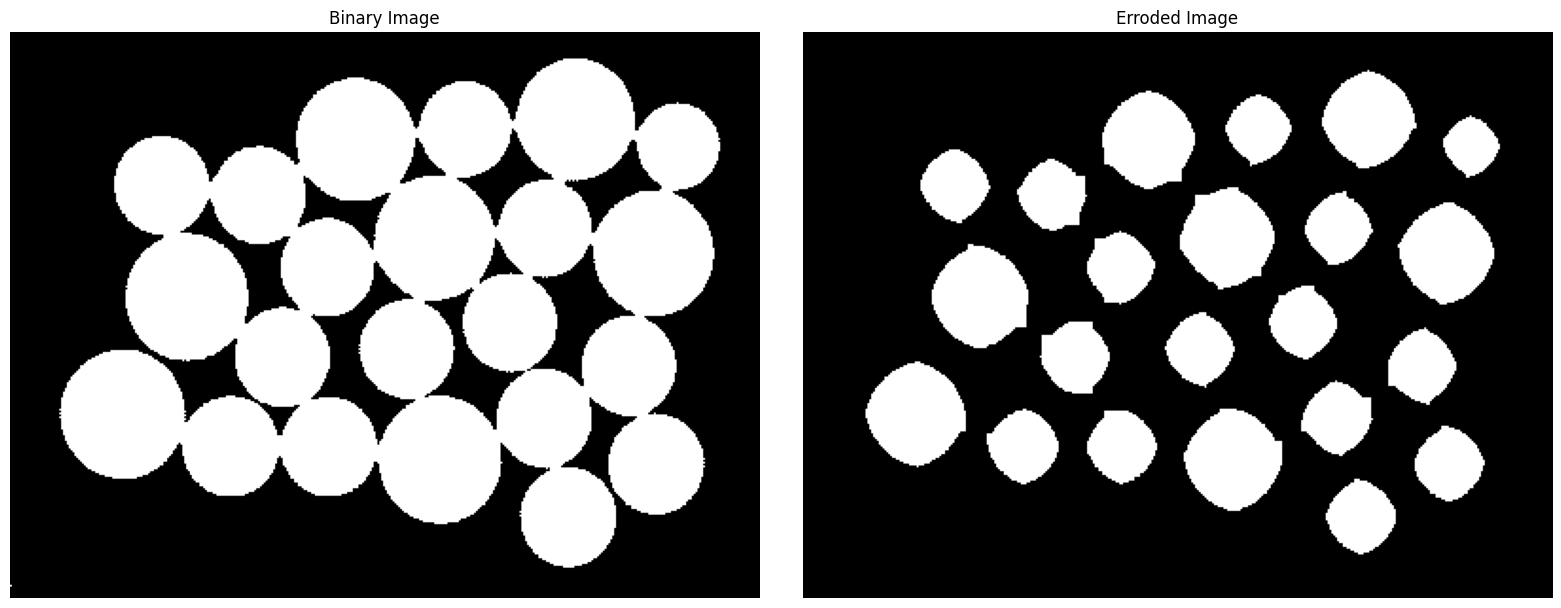

In [28]:
def erosion(input_image, structuring_element):
    h, w = input_image.shape
    sh, sw = structuring_element.shape
    
    ph, pw = sh // 2, sw // 2
    padded = np.pad(input_image, ((ph, ph), (pw, pw)), mode='constant', constant_values=0)
    
    eroded = np.zeros_like(input_image)
    
    for i in range(h):
        for j in range(w):
            roi = padded[i:i+sh, j:j+sw]
            
            if np.all(roi[structuring_element == 1] == 1):
                eroded[i, j] = 1
    
    return eroded


# Create a disk-shaped structuring element (approximated with a 5x5 matrix)
se = np.ones((13,13), dtype=np.uint8)

eroded_image = erosion(binary_image, se)

show_results(
    images=[binary_image, eroded_image],
    titles=['Binary Image', 'Erroded Image'],
    cols=2, cmap='gray'
)

The objects shapes has been destroyed. Apply disk SE.

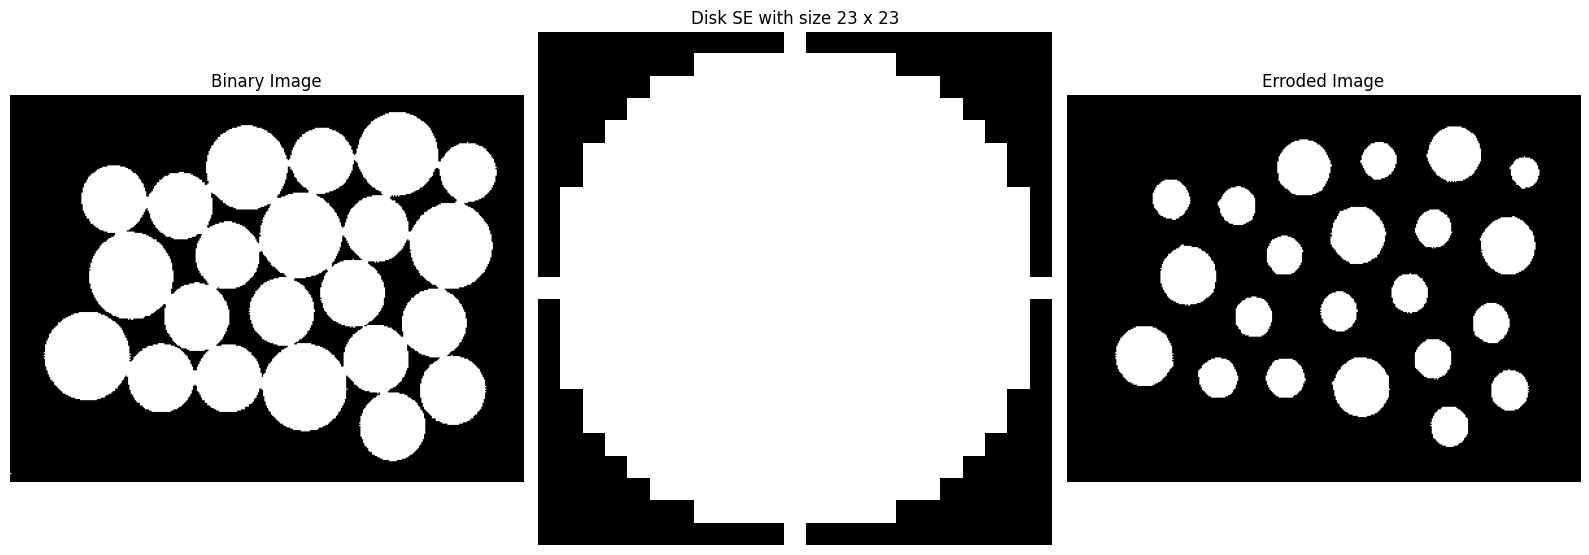

In [17]:
def create_disk_se(radius):
    size = 2 * radius + 1  # Diameter of the disk
    se = np.zeros((size, size), dtype=np.uint8)
    center = radius
    for i in range(size):
        for j in range(size):
            if (i - center)**2 + (j - center)**2 <= radius**2: # Finding Euclidean distance from center, if less or equal then the pixel is inside the disk
                se[i, j] = 1
    return se

# Generate the 11x11 disk-shaped structuring element with a radius of 5
se = create_disk_se(11)
eroded_image = erosion(binary_image, se)
show_results(
    images=[binary_image, se, eroded_image],
    titles=['Binary Image', 'Disk SE with size 23 x 23', 'Erroded Image'],
    cols=3, cmap='gray'
)

### Example : Using erosion to remove image components

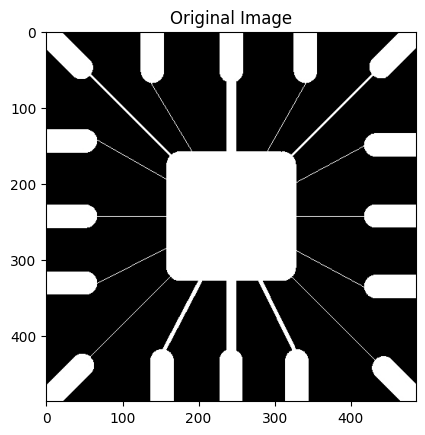

In [22]:
image = cv2.imread('cir.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

Image eroding wih  square structuring elements of sizes 11 x 11

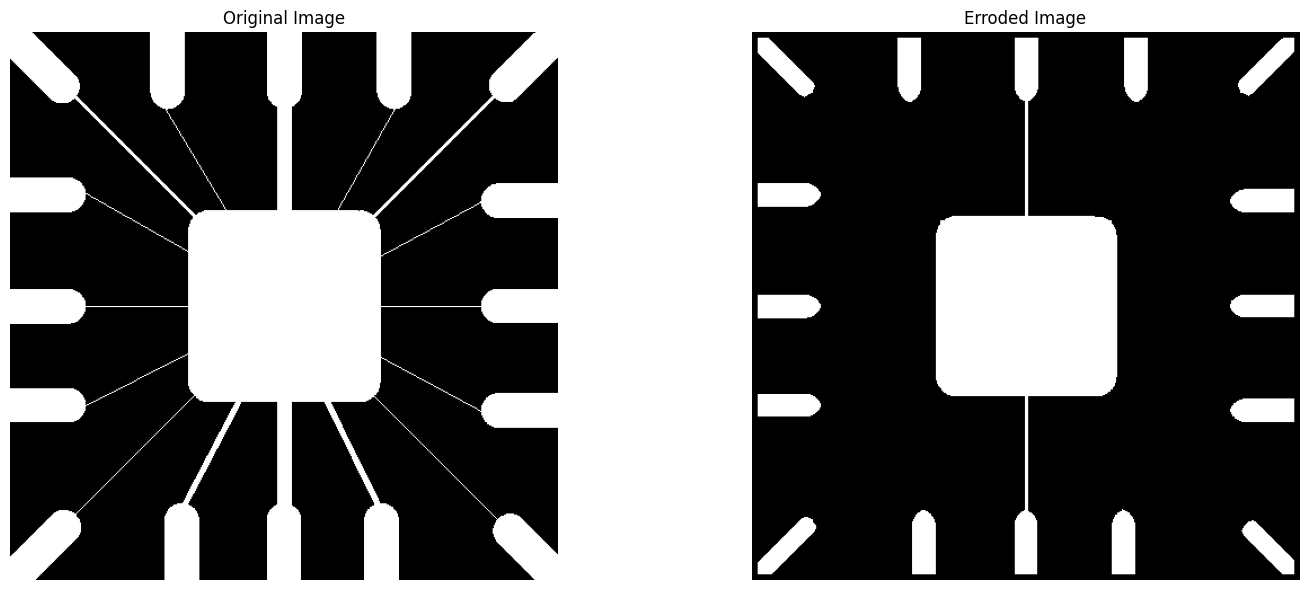

In [ ]:
def create_square_se(size):
    se = np.ones((size, size), dtype=np.uint8)
    return se

se = create_square_se(11)

se_rows, se_cols = se.shape
padding_size = (se_rows // 2, se_cols // 2)
padded_image = np.pad(image, padding_size, mode='constant', constant_values=0)

eroded_image11x11 = np.zeros_like(image)
rows, cols = eroded_image11x11.shape

# Perform erosion
for row in range(rows):
    for col in range(cols):
        # Extract region of interest (ROI)
        roi = padded_image[row:row+se_rows, col:col+se_cols]

        # Erosion condition: structuring element must fit entirely within the foreground    
        erroded_vals = roi * se  # Our se contains only 1's and if the product result black pixel (0) appears anywhere, then the erosion condition fails
        eroded_image11x11[row , col] = 0 if np.any(erroded_vals == 0) else 1

# Visualize the structuring elements
show_results(
    images=[image, eroded_image11x11],
    titles=['Original Image', 'Erroded Image 11 x 11'],
    cols=2, cmap='gray'
)

Image eroding wih  square structuring elements of sizes 15 x 15 <br>

Now also let's define a function for errosion

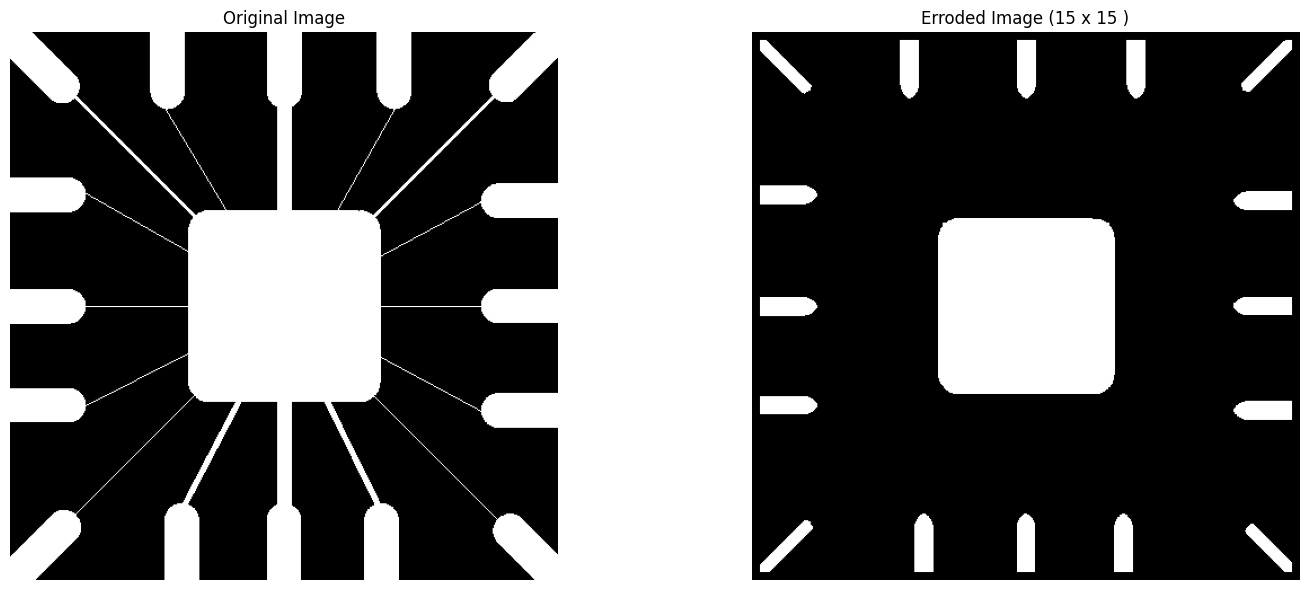

In [44]:
def erosion(input_image, structuring_element):
    h, w = input_image.shape
    sh, sw = structuring_element.shape
    
    ph, pw = sh // 2, sw // 2
    padded = np.pad(input_image, ((ph, ph), (pw, pw)), mode='constant', constant_values=0)
    
    eroded = np.zeros_like(input_image)
    
    for i in range(h):
        for j in range(w):
            roi = padded[i:i+sh, j:j+sw]
            
            erroded_vals = roi * structuring_element
            eroded[i, j] = 0 if np.any(erroded_vals == 0) else 1
    
    return eroded

se = create_square_se(15)
eroded_image15x15 = erosion(image, se)
show_results(
    images=[image, eroded_image15x15],
    titles=['Original Image', 'Erroded Image (15 x 15 )'],
    cols=2, cmap='gray'
)

Image eroding wih  square structuring elements of sizes 45 x 45

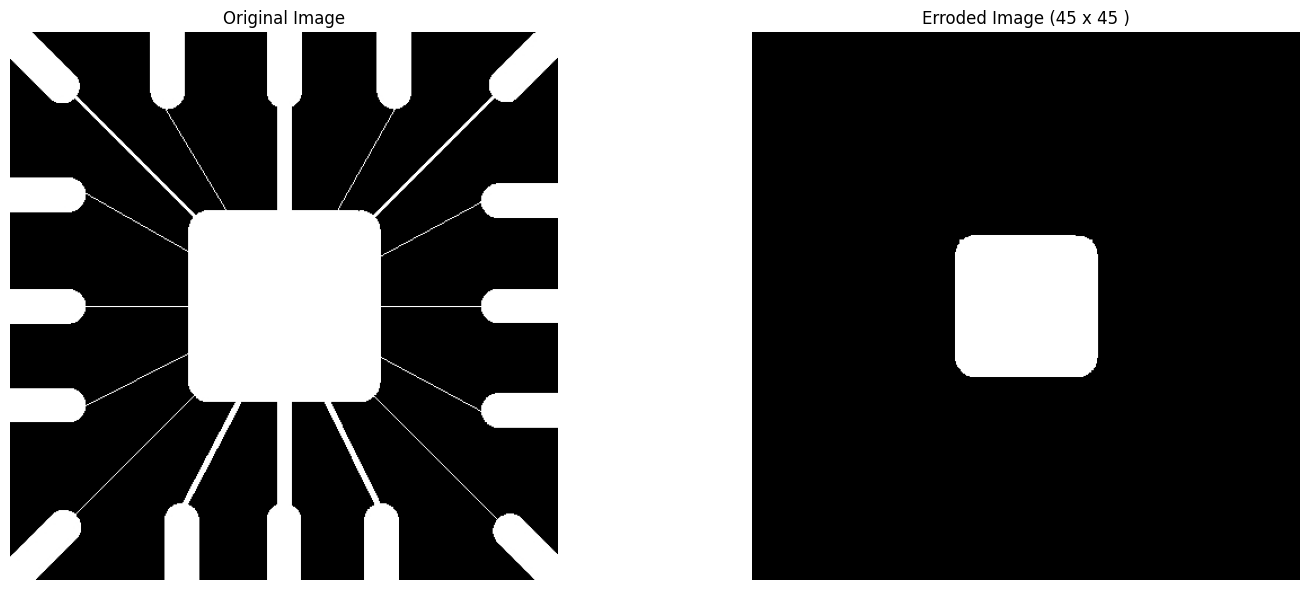

In [46]:
se = create_square_se(45)
eroded_image45x45 = erosion(image, se)
show_results(
    images=[image,eroded_image45x45],
    titles=['Original Image', 'Erroded Image (45 x 45 )'],
    cols=2, cmap='gray'
)

Plotting all results

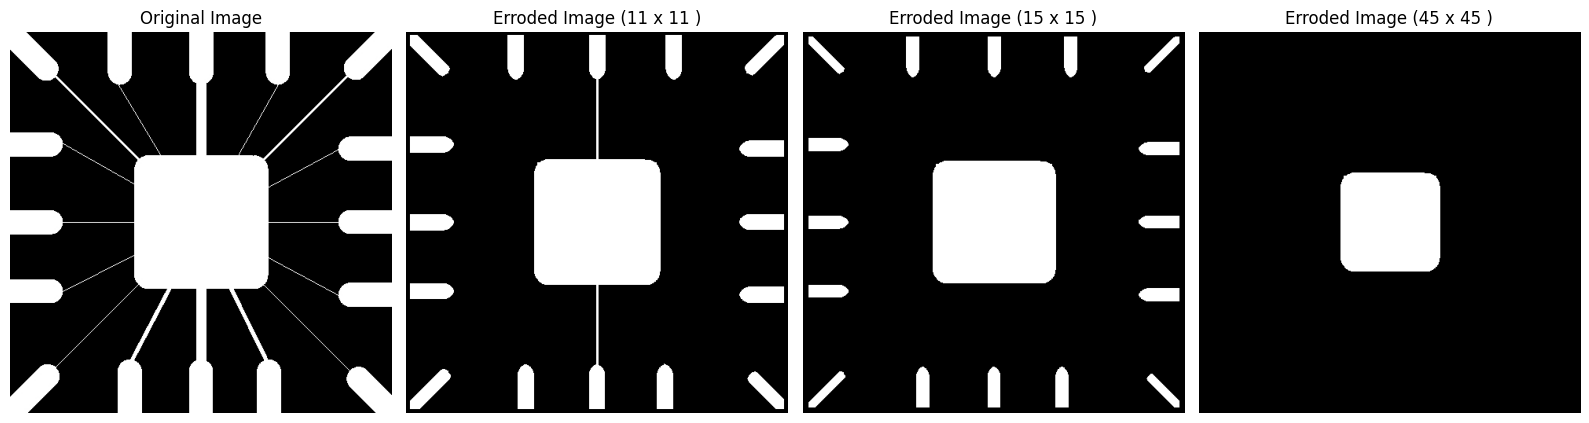

In [48]:
show_results(
    images=[image, eroded_image11x11, eroded_image15x15, eroded_image45x45],
    titles=['Original Image', 'Erroded Image (11 x 11 )', 'Erroded Image (15 x 15 )', 'Erroded Image (45 x 45 )'],
    cols=4, cmap='gray'
)

# Some Practical Examples of Dilation

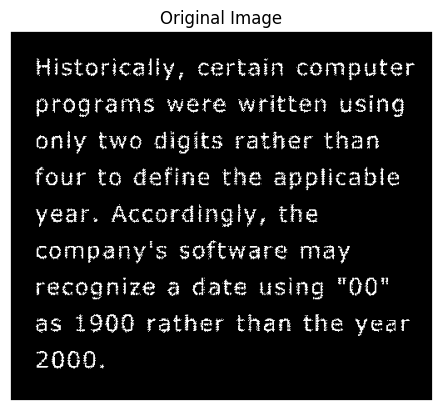

In [50]:
image = cv2.imread('Fig0907(a)(text_gaps_1_and_2_pixels).tif', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

We can clearly see the broken letters in the image text. Dilation helps to construct these broken letters

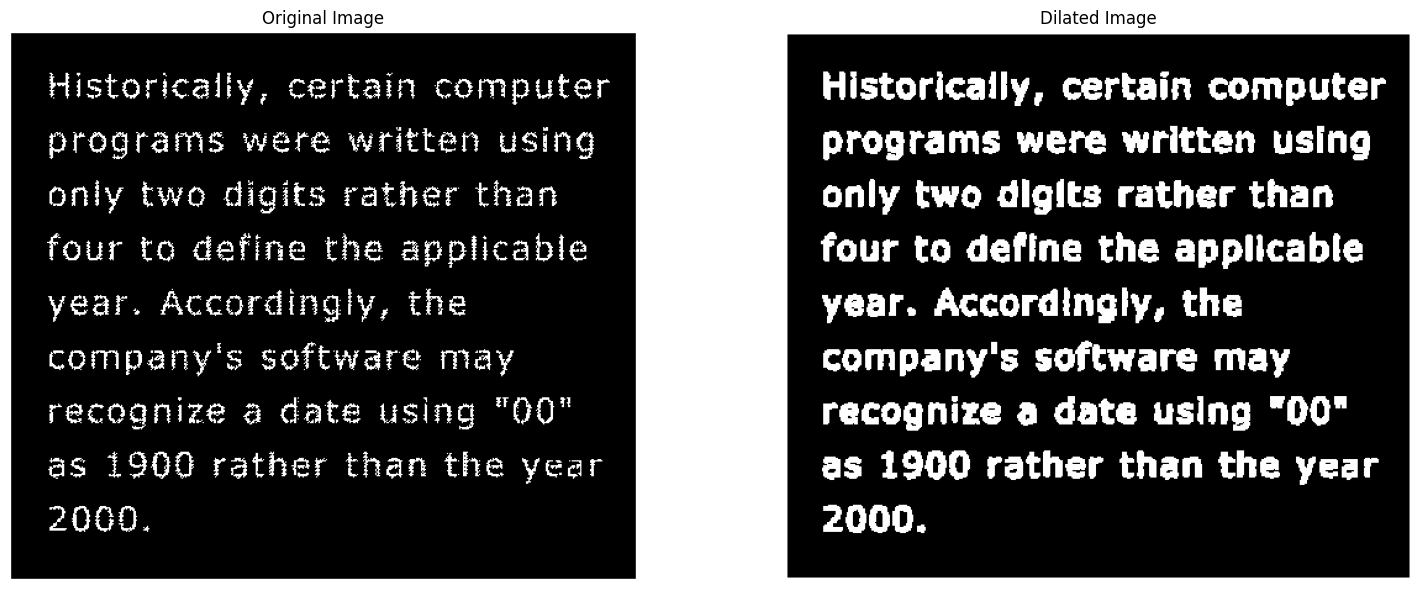

In [52]:
se = create_square_se(3)

def dilation(input_image, structuring_element):
    h, w = input_image.shape
    sh, sw = structuring_element.shape
    
    ph, pw = sh // 2, sw // 2
    padded = np.pad(input_image, ((ph, ph), (pw, pw)), mode='constant', constant_values=0)
    
    dilated = np.zeros_like(input_image)
    
    for i in range(h):
        for j in range(w):
            roi = padded[i:i+sh, j:j+sw]
            
            dilated_vals = roi * structuring_element
            dilated[i, j] = 1 if np.any(dilated_vals == 255) else 0
    
    return dilated

dilated_image = dilation(image, se)
show_results(
    images=[image, dilated_image],
    titles=['Original Image', 'Dilated Image'],
    cols=2, cmap='gray'
)

## Compound Operations (Opening, Closing)

### Opening

Opening is a sequence of erosion followed by dilation. It removes small objects and noise while maintaining the overall structure of the larger objects.

(np.float64(-0.5), np.float64(49.5), np.float64(49.5), np.float64(-0.5))

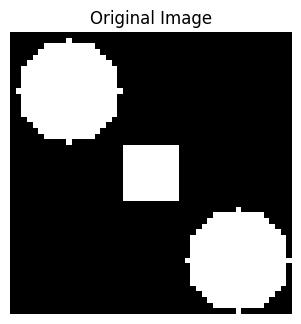

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, binary_dilation

# Create a beautiful binary image with some shapes (circles and squares)
image = np.zeros((50, 50), dtype=np.uint8)

# Adding a square in the center
image[20:30, 20:30] = 1

# Adding circles
y, x = np.ogrid[:50, :50]
circle1 = (x - 10)**2 + (y - 10)**2 <= 9**2
circle2 = (x - 40)**2 + (y - 40)**2 <= 9**2
image[circle1] = 1
image[circle2] = 1

# Adding some small noise to the image
image[10:12, 10:12] = 1
image[35:37, 35:37] = 1

# Display the original image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

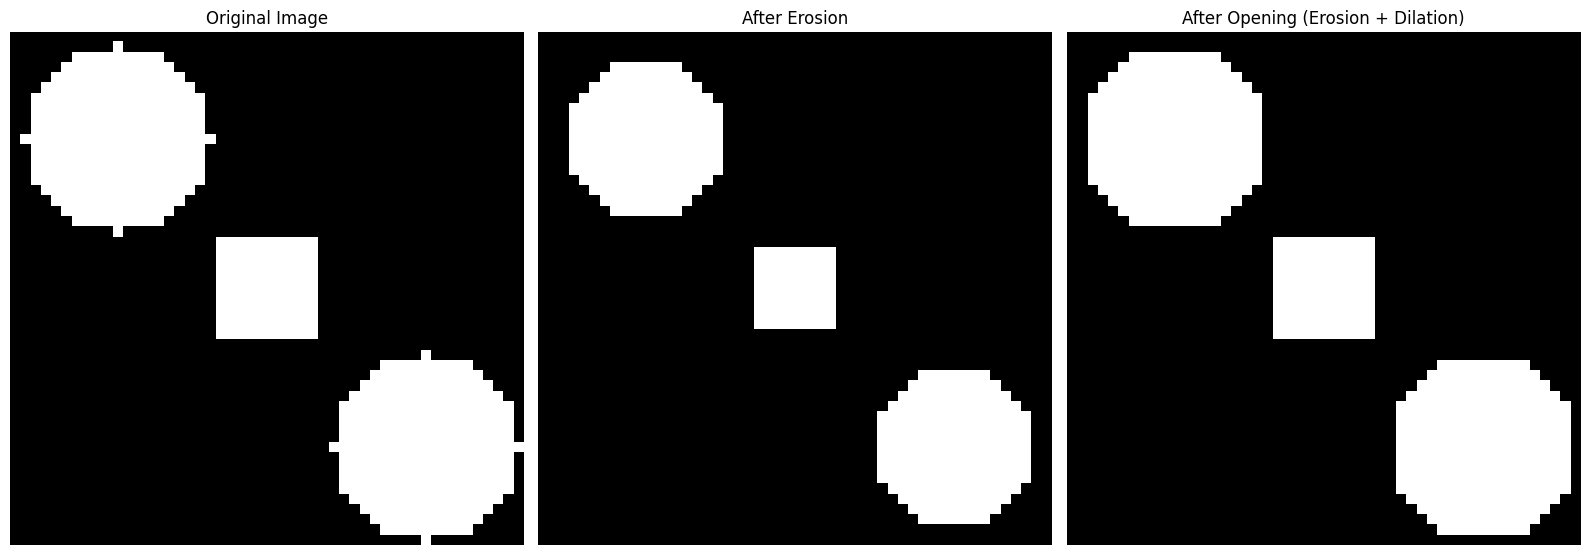

In [ ]:
# define se
se = np.ones((3, 3), dtype=np.uint8)

# Perform opening (erosion followed by dilation)
eroded_image = erosion(image, se) # Using previously defined erosion function
dilated_image = dilation(eroded_image*255, se) # Using previously defined dilation function, scaling eroded image to 255 for dilation function

# Display the results
show_results(
    images=[image, eroded_image, dilated_image],
    titles=['Original Image', 'After Erosion', 'After Opening (Erosion + Dilation)'],
    cols=3, cmap='gray'
)


We can clearly see, the result of erosion remove the noise and shrink the object while dilation again enlarge them to its original shape

### Closing:

Closing is a sequence of dilation followed by erosion. It fills small holes and gaps in objects.

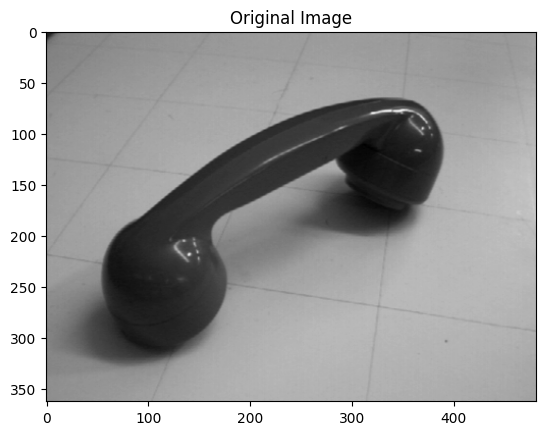

In [100]:
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.show()

### Threshold the image

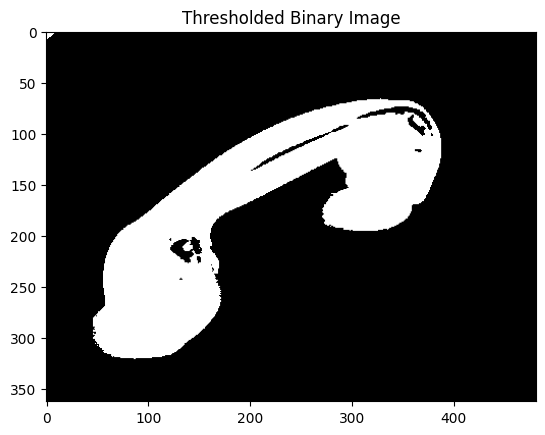

In [106]:
thresh_image = np.where(image > 100, 0, 1).astype(np.uint8)
plt.imshow(thresh_image, cmap='gray')
plt.title("Thresholded Binary Image")
plt.show()

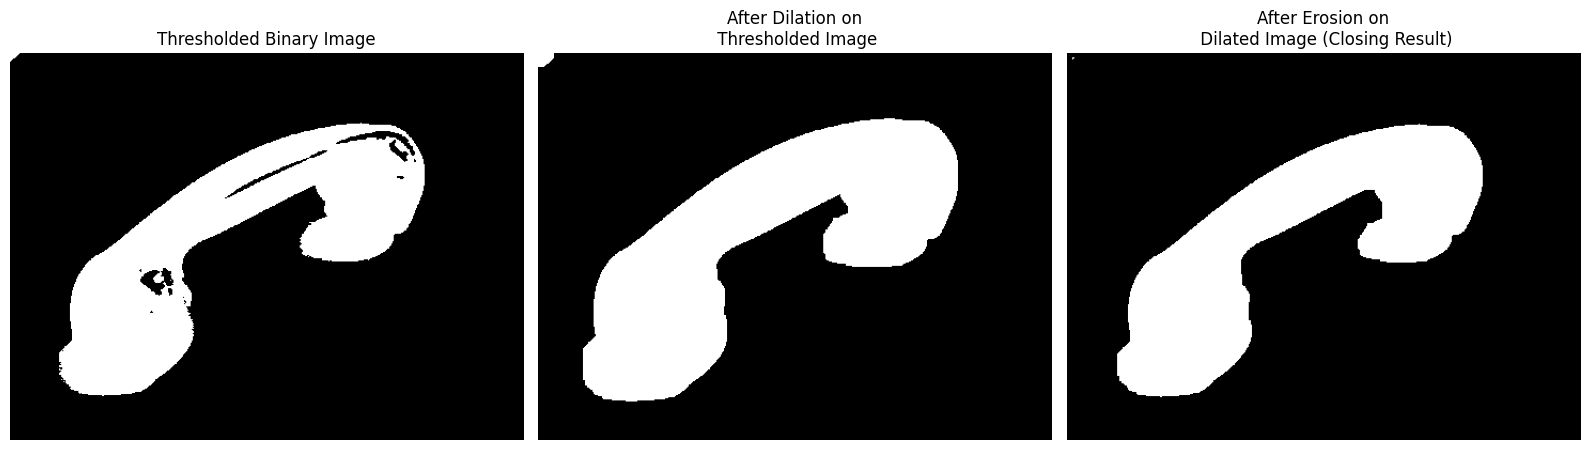

In [110]:
se = np.ones((10, 10), dtype=np.uint8)
dilated_image = dilation(thresh_image * 255, se) # Using previously defined dilation function
closed_image = erosion(dilated_image, se) # Using previously defined erosion function
show_results(
    images = [thresh_image, dilated_image, closed_image],
    titles = ["Thresholded Binary Image", "After Dilation on\n Thresholded Image", "After Erosion on\n Dilated Image (Closing Result)"],
    cols = 3, cmap='gray'
)

## Practical Examples of Opening & Closing

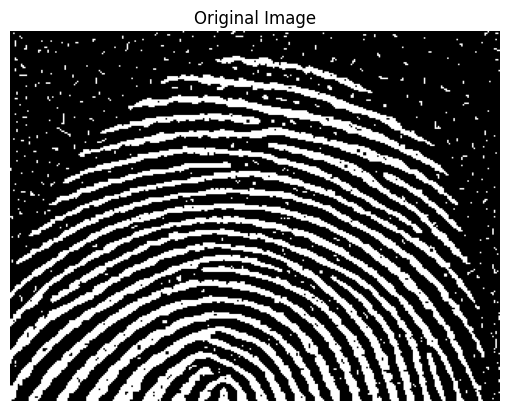

In [88]:
image = cv2.imread('Fig0911(a)(noisy_fingerprint).tif', cv2.IMREAD_GRAYSCALE)
image = np.where(image == 255, 1, 0).astype(np.uint8)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# We will apply these steps  of opening and closing to process this image and remove the noise


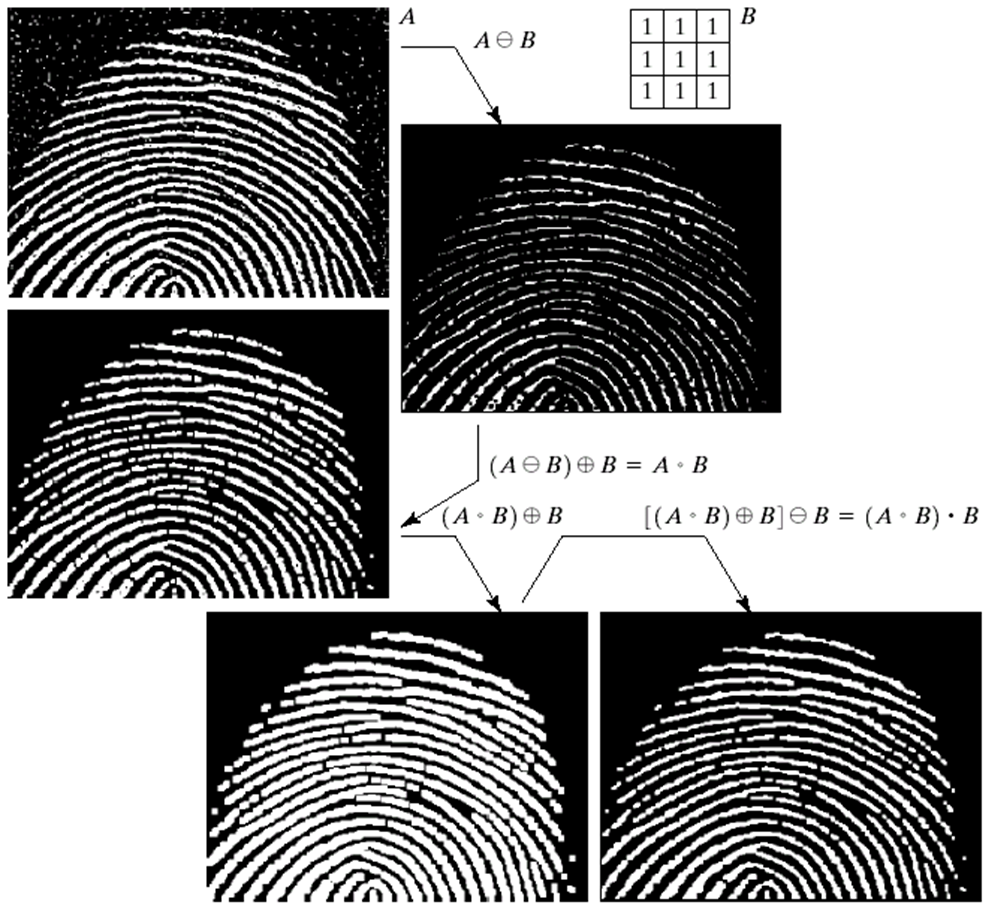

##### Apply Opening First

For opening apply errosion first

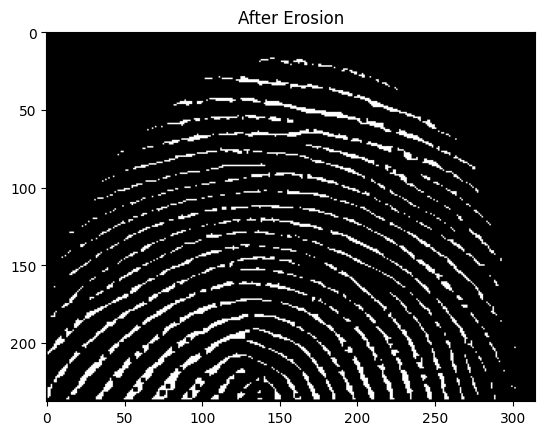

In [91]:
se = create_square_se(3)
eroded_image = erosion(image, se) # Using previously defined erosion function
plt.imshow(eroded_image, cmap='gray')
plt.title("After Erosion")
plt.show()

Now we will apply dilation on this eroded image

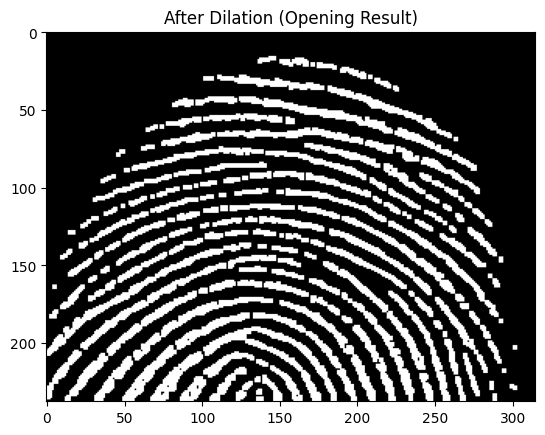

In [93]:
opened_image = dilation(eroded_image*255, se) # Using previously defined dilation function, scaling eroded image to 255 for dilation function
plt.imshow(opened_image, cmap='gray')
plt.title("After Dilation (Opening Result)")
plt.show()

See, The major noise has been removed but still the figerprints are broken. Apply dilation on the opened image

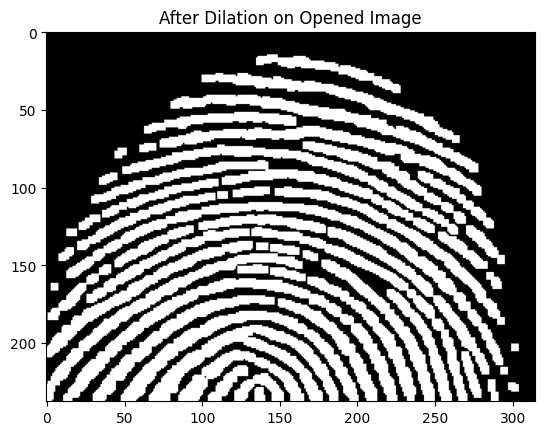

In [94]:
dilated_image = dilation(opened_image * 255, se) # Using previously defined dilation function
plt.imshow(dilated_image, cmap='gray')
plt.title("After Dilation on Opened Image")
plt.show()

Now we will apply erosion as the fingerprints are now become thick. This erosion after dilation is called closing.

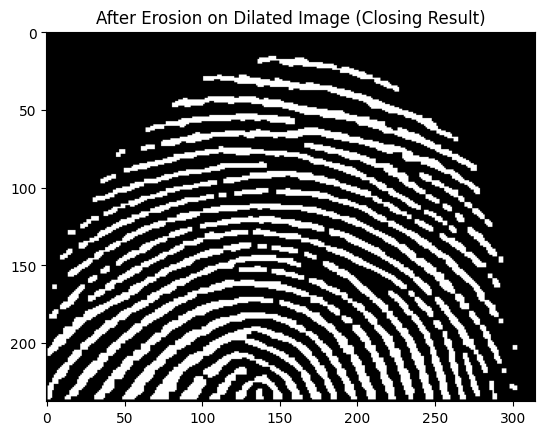

In [95]:
closed_image = erosion(dilated_image, se) # Using previously defined erosion function
plt.imshow(closed_image, cmap='gray')
plt.title("After Erosion on Dilated Image (Closing Result)")
plt.show()

Now we have reached our goal. The noise has been removed, the fingerprints are not broken that much. Overall image enhanced

#### Plot the whole process results

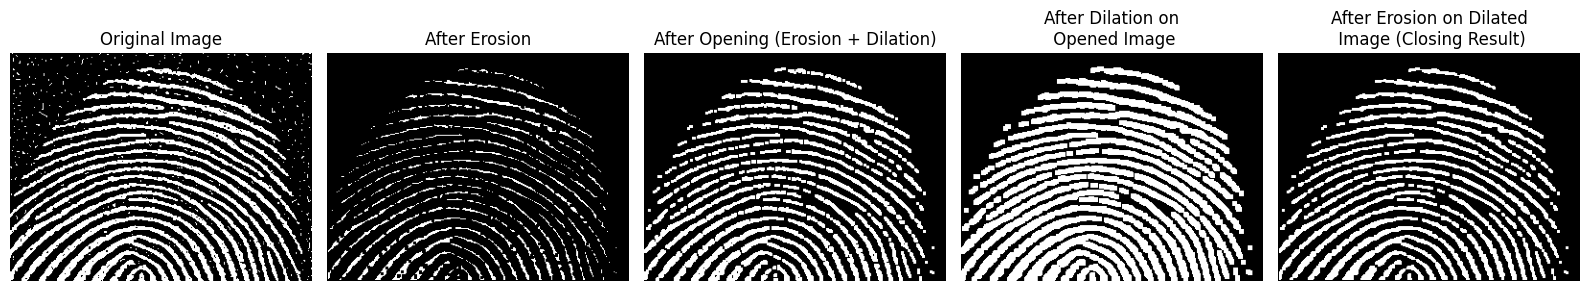

In [98]:
show_results(
    images = [image, eroded_image, opened_image, dilated_image, closed_image],
    titles = ["Original Image", "After Erosion", "After Opening (Erosion + Dilation)", "After Dilation on\n Opened Image", "After Erosion on Dilated\n Image (Closing Result)"],
    cols = 5, cmap='gray'
)